## Stock Price Prediction Model

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



from copy import copy

In [3]:
df = pd.read_csv(r"D:\ALL Projects\1ML\Stock_Price_Prediction\stocks_dataset.csv")
df.head()

,Date,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
0,11/7/2013,47.560001,44.900002,46.694286,131.509995,35.110001,18.580000,139.770004,1747.150024
1,11/8/2013,47.529999,41.650002,47.842857,133.490005,35.169998,19.090000,137.949997,1770.609985
2,11/11/2013,46.200001,42.900002,48.272858,132.529999,35.029999,19.200001,144.699997,1771.890015
3,11/12/2013,46.610001,41.900002,47.675713,132.330002,35.169998,19.260000,137.800003,1767.689941
4,11/13/2013,48.709999,42.599998,47.897144,133.169998,35.070000,19.700001,138.699997,1782.000000


| Column    | Description                                                              |
| --------- | ------------------------------------------------------------------------ |
| **Date**  | The trading date (string format right now — should convert to datetime). |
| **FB**    | Facebook (Meta) stock closing price.                                     |
| **TWTR**  | Twitter closing price.                                                   |
| **NFLX**  | Netflix closing price.                                                   |
| **BA**    | Boeing closing price.                                                    |
| **T**     | AT&T closing price.                                                      |
| **MGM**   | MGM Resorts closing price.                                               |
| **TSLA**  | Tesla closing price.                                                     |
| **sp500** | S&P 500 index closing value (market benchmark).                          |


In [4]:
## data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1699 non-null   object 
 1   FB      1699 non-null   float64
 2   TWTR    1699 non-null   float64
 3   NFLX    1699 non-null   float64
 4   BA      1699 non-null   float64
 5   T       1699 non-null   float64
 6   MGM     1699 non-null   float64
 7   TSLA    1699 non-null   float64
 8   sp500   1699 non-null   float64
dtypes: float64(8), object(1)
memory usage: 119.6+ KB


In [5]:
# describe the data
df.describe()

,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
count,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000
mean,135.966863,31.296698,195.423654,218.325633,35.296986,25.720865,311.299388,2413.219428
std,50.062473,11.508628,127.700712,98.968191,3.412142,5.200605,203.097452,424.825240
min,44.820000,14.010000,44.887142,95.010002,26.770000,7.140000,120.500000,1741.890015
25%,88.080002,19.600001,90.474998,132.840004,32.790001,21.935001,218.829994,2053.294921
50%,136.759995,31.610001,143.830002,158.289993,34.900002,25.879999,253.740005,2360.159912
75%,178.075005,38.229999,320.024993,334.360001,38.004999,29.250000,323.565002,2783.330078
max,268.440002,73.309998,548.729980,440.619995,43.470001,38.029999,1643.000000,3386.149902


| Stock              | Mean (Average $) | Std (Volatility) | Min → Max         | Interpretation                                                                          |
| ------------------ | ---------------- | ---------------- | ----------------- | --------------------------------------------------------------------------------------- |
| **FB (Meta)**      | 135.97           | 50.06            | 44.82 → 268.44    | Moderate growth, medium volatility.                                                     |
| **TWTR (Twitter)** | 31.30            | 11.51            | 14.01 → 73.31     | Stayed relatively low, some spikes but not huge.                                        |
| **NFLX (Netflix)** | 195.42           | 127.70           | 44.89 → 548.73    | High volatility — price fluctuates a lot.                                               |
| **BA (Boeing)**    | 218.33           | 98.97            | 95.01 → 440.62    | Also very volatile — likely affected by global events (e.g., 737 MAX issues, pandemic). |
| **T (AT&T)**       | 35.30            | 3.41             | 26.77 → 43.47     | Very stable — low-risk, low-volatility telecom stock.                                   |
| **MGM**            | 25.72            | 5.20             | 7.14 → 38.03      | Moderate volatility — sensitive to travel/tourism cycles.                               |
| **TSLA (Tesla)**   | 311.30           | 203.10           | 120.5 → 1643.0    | Extremely volatile — massive growth potential but high risk.                            |
| **S&P 500**        | 2413.22          | 424.83           | 1741.89 → 3386.15 | Represents overall market trend — generally upward movement.                            |


Note : Tesla and Netflix are high-risk, high-reward stocks.
AT&T is very stable, more like a defensive or dividend stock.

# Data Preprocessing

In [6]:
# Function to normalize data ---> initial / first price  -----> To Remove Scale Differences
def normalize_data(data):
    normal = data.copy()
    for col in normal.columns:
        normal[col] = normal[col] / normal[col].iloc[0]
        
    return normal

In [7]:
normalize_data(df.set_index('Date'))

,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
Date,,,,,,,,
11/7/2013,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
11/8/2013,0.999369,0.927617,1.024598,1.015056,1.001709,1.027449,0.986979,1.013428
11/11/2013,0.971405,0.955457,1.033807,1.007756,0.997721,1.033369,1.035272,1.014160
11/12/2013,0.980025,0.933185,1.021018,1.006235,1.001709,1.036598,0.985905,1.011756
11/13/2013,1.024180,0.948775,1.025760,1.012623,0.998861,1.060280,0.992345,1.019947
...,...,...,...,...,...,...,...,...
8/3/2020,5.297729,0.810468,10.678394,1.233899,0.843634,0.878364,10.624597,1.885705
8/4/2020,5.252944,0.809577,10.914398,1.255190,0.854742,0.899892,10.638906,1.892516
8/5/2020,5.238015,0.819376,10.753136,1.325222,0.850185,0.899892,10.624740,1.904685


## Data Visualization

In [8]:
def plot_normalized_data(normalized_data):
    plt.figure(figsize=(15, 8))
    for column in normalized_data.columns:
        plt.plot(normalized_data.index, normalized_data[column], label=column)
    plt.xlabel('Date')
    plt.ylabel(' Price')
    plt.title('Stock Prices Over Time')
    plt.legend()
    plt.show()

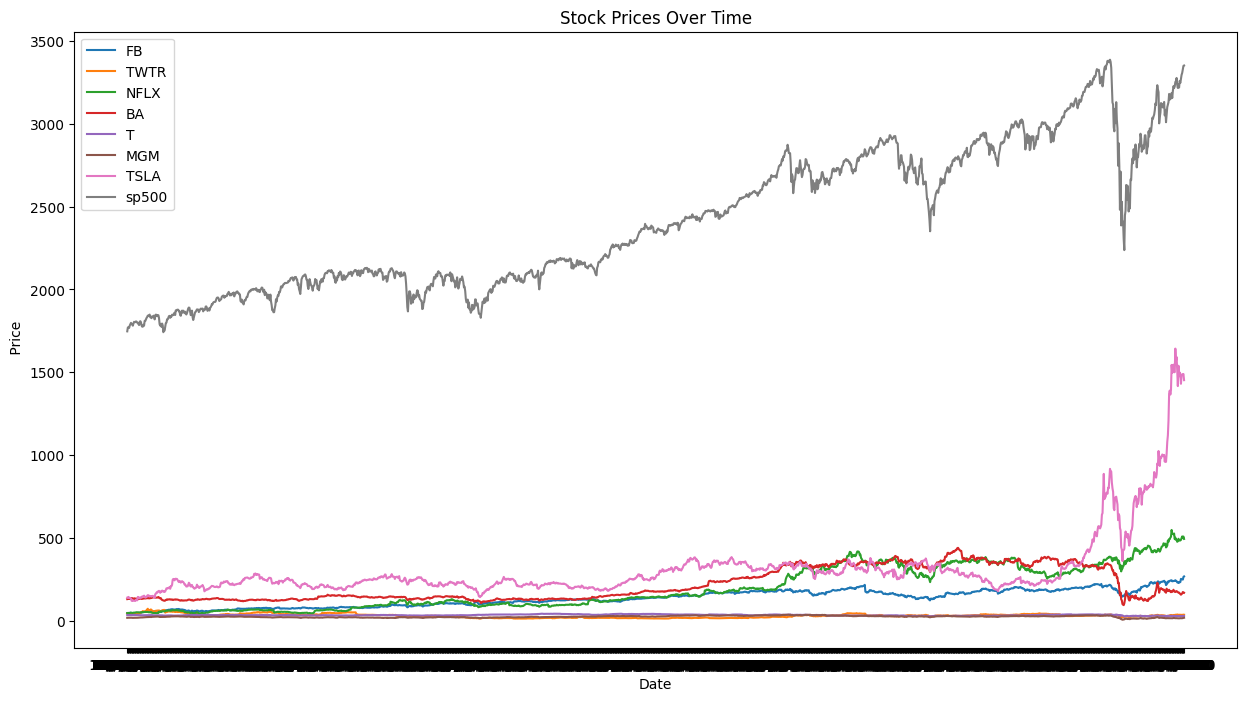

In [9]:
# check data distribution before normalization
plot_normalized_data(df.set_index('Date'))

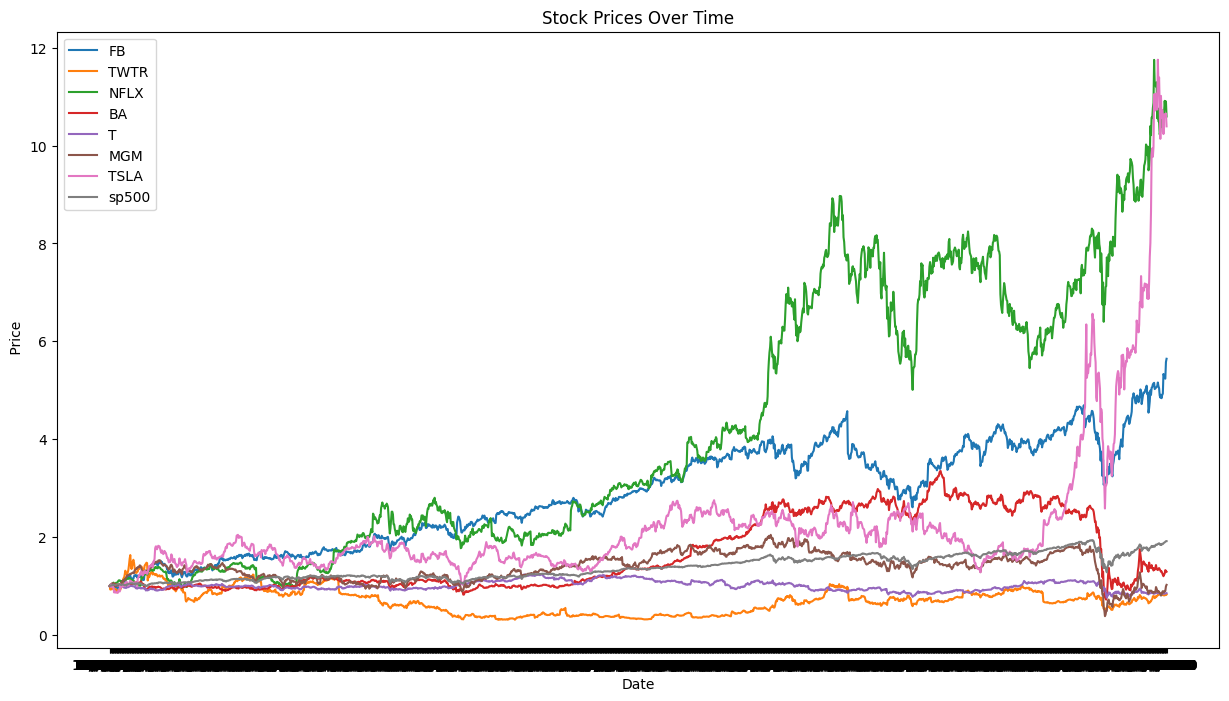

In [10]:
# check data distribution after normalization
plot_normalized_data(normalize_data(df.set_index('Date')))

Calculate daily return:

Daily Return (%)
=
((Today Price
−
Yesterday Price)
/
Yesterday Price)
×
100


In [11]:
import numpy as np
import pandas as pd

def calculate_daily_returns(data):
    # Make a copy to avoid modifying original
    df_returns = data.copy()
    
    # Select only numeric columns (ignore Date)
    numeric_cols = df_returns.select_dtypes(include=[np.number]).columns
    
    # Calculate daily returns using vectorized pct_change
    df_returns[numeric_cols] = df_returns[numeric_cols].pct_change() * 100
    
    # Set first row to 0 (no previous day)
    df_returns.loc[0, numeric_cols] = 0
    
    return df_returns


In [12]:
stock_daily_returns = calculate_daily_returns(df)
stock_daily_returns.head()

,Date,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
0,11/7/2013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,11/8/2013,-0.063082,-7.238307,2.459768,1.505597,0.170883,2.744887,-1.302144,1.342756
2,11/11/2013,-2.798229,3.001200,0.898778,-0.719159,-0.398064,0.576223,4.893077,0.072293
3,11/12/2013,0.887446,-2.331002,-1.237020,-0.150907,0.399655,0.312495,-4.768482,-0.237039
4,11/13/2013,4.505467,1.670635,0.464452,0.634774,-0.284328,2.284533,0.653116,0.809534


## Calculaty Beta for Tesla Stock

<Axes: xlabel='sp500', ylabel='TSLA'>

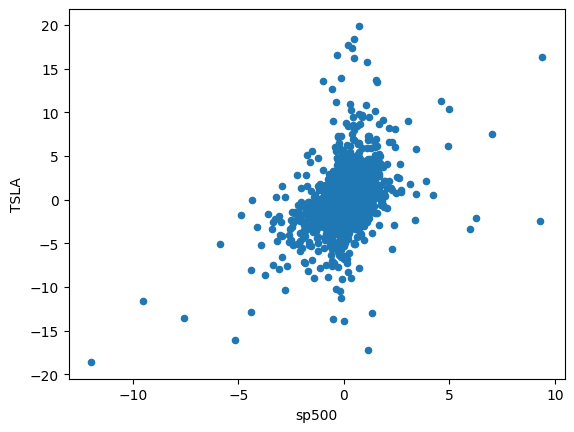

In [13]:
# plot a scatter plot between the Tesla and the S&P500 (Market)
stock_daily_returns.plot(kind = 'scatter', x = 'sp500', y = 'TSLA')

In [14]:
# Fit a polynomial between the selected stock and the S&P500 

# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets 

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market. 
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market. 
# Tech stocks generally have higher betas than S&P500 but they also have excess returns


beta, alpha = np.polyfit(stock_daily_returns['sp500'], stock_daily_returns['TSLA'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('TSLA', beta, alpha))  

Beta for TSLA stock is = 1.2359723602006571 and alpha is = 0.13716200993236893


# np.polyfit(X, Y, 1)
Fits a linear regression line of degree 1 (Y = βX + α)                                                                    
here , beta ---> Slope  &&  alpha ---> intercept



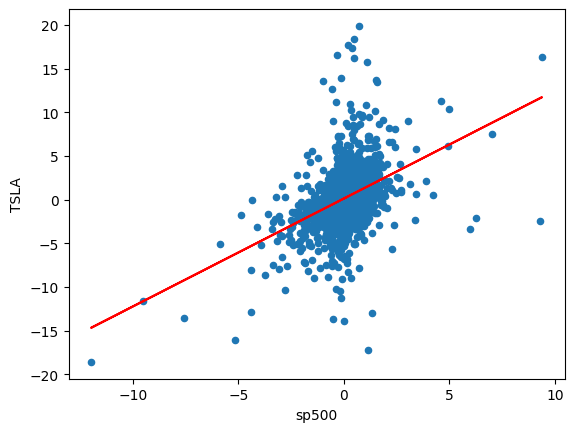

In [15]:
## Scatter plot with regression line
stock_daily_returns.plot(kind = 'scatter', x = 'sp500', y = 'TSLA')
plt.plot(stock_daily_returns['sp500'], beta * stock_daily_returns['sp500'] + alpha, color='red')

stocks_daily_return['sp500']	X-axis (market return)                                                                                                
beta * stocks_daily_return['sp500'] + alpha	Predicted TSLA return (Y-axis) — the fitted line

The CAPM (Capital Asset Pricing Model) formula is:

Expected Return
=
𝑅
𝑓
+
𝛽
(
𝑅
𝑚
−
𝑅
𝑓
)

--------------------------------------------------------------------------------------------------------------
| Symbol        | Meaning                                 |
| ------------- | --------------------------------------- |
| ( R_f )       | Risk-free rate (e.g., govt. bond yield) |
| ( \beta )     | Stock’s sensitivity relative to market  |
| ( R_m )       | Expected market return                  |
| ( R_m - R_f ) | Market risk premium                     |
------------------------------------------------------------------------------------------------------------
CAPM says the return of a stock = risk-free return + compensation for market risk.

If β > 1 → more volatile than market (riskier, higher expected return)

If β < 1 → safer/lower volatility, lower expected return


## Apply CAPM formula for Each Stock

In [16]:
# Calculate the annual return rate for s&p500
# stock exchange are open for 252 days in a year ( closed on weekends and holidays)
rm = stock_daily_returns['sp500'].mean() * 252
rm

np.float64(11.2325516560291)

In [17]:
# Assume risk free rate is 0%
# ideal risk-free rate should satisfy:

# ✅ Zero default risk
# ✅ Guaranteed by government
# ✅ Matches the time horizon of your investment

rf = 0

# calculate the expected return for Tesla stock using CAPM formula
ER_TSLA = rf + beta * (rm - rf)
ER_TSLA
# Expected return = How much we expect to earn from an investment on average.

np.float64(13.883123381378088)

## Calculate beta for every stock and see the regression line( beta = slope of the line)

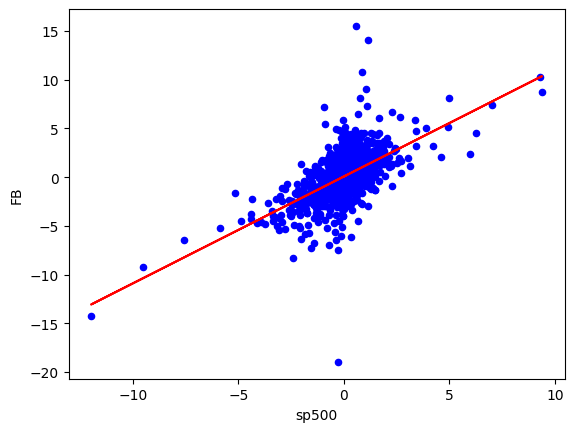

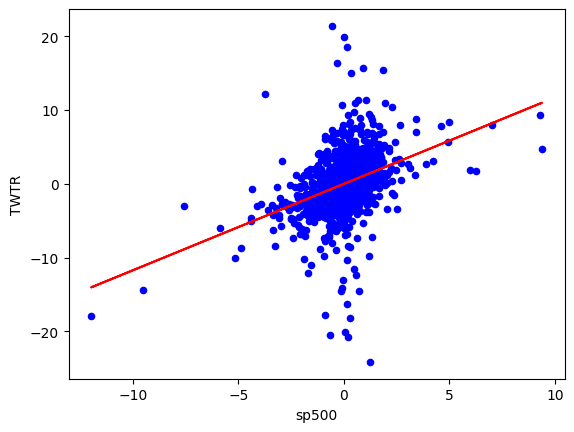

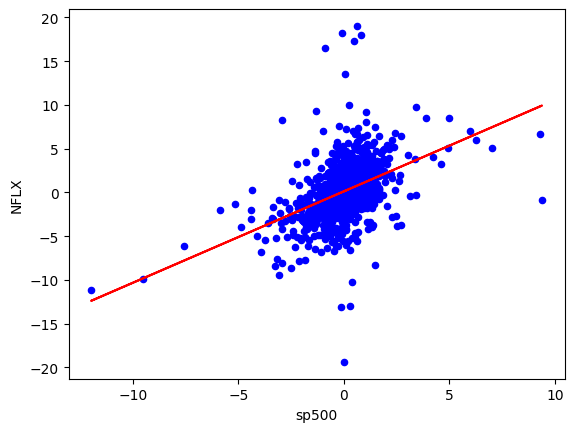

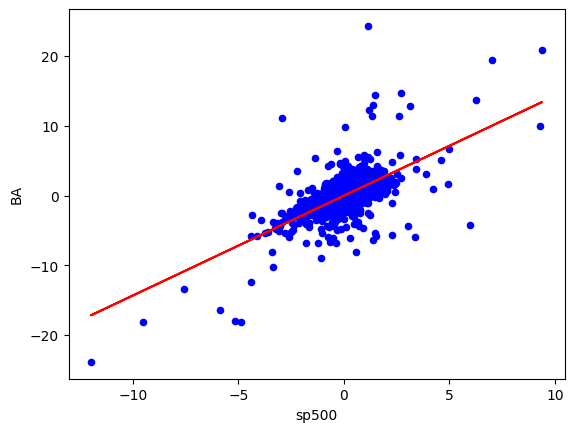

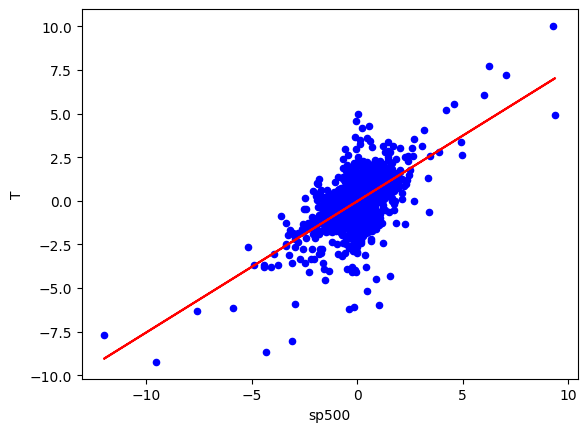

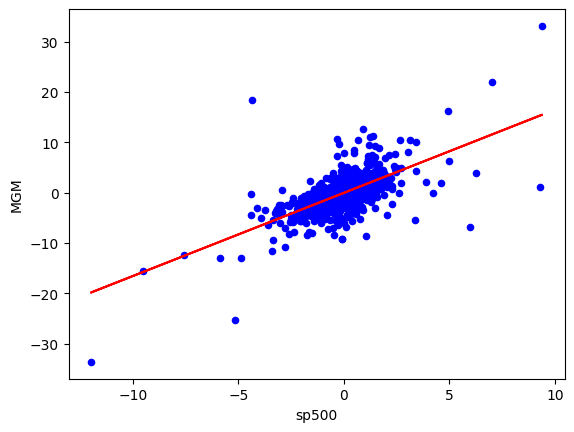

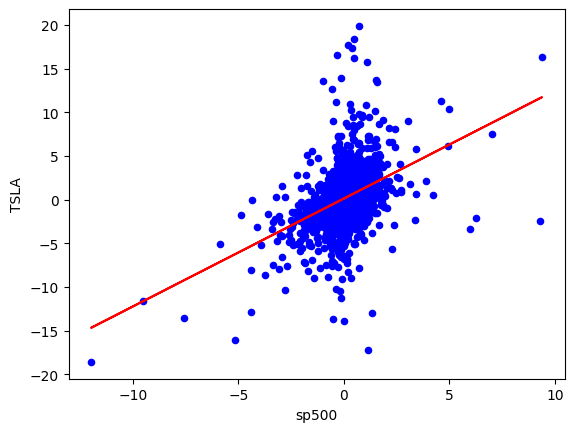

In [18]:
# Dictionary for key val pairs of betas and alphas
betas = {}
alphas = {}

# loop through each stock column (excluding 'sp500' and 'Date')
for stock in stock_daily_returns.columns:
    
    # ignore 'sp500' and 'Date' columns
    if stock not in ['sp500', 'Date']:
        
        # Scatter plot between the stock and the S&P500 
        stock_daily_returns.plot(kind = 'scatter', x = 'sp500', y = stock, color='blue')
        
        # Fit polynomial to get beta and alpha
        b, a = np.polyfit(stock_daily_returns['sp500'], stock_daily_returns[stock], 1)
        
        # regression line
        plt.plot(stock_daily_returns['sp500'], b * stock_daily_returns['sp500'] + a, color='red')
        
        betas[stock] = b
        alphas[stock] = a
        
        plt.show()

In [19]:
betas

{'FB': np.float64(1.0968490880203263),
 'TWTR': np.float64(1.1723596183159948),
 'NFLX': np.float64(1.0445724485449475),
 'BA': np.float64(1.4304608163084238),
 'T': np.float64(0.7523861924715607),
 'MGM': np.float64(1.6517124147928914),
 'TSLA': np.float64(1.2359723602006571)}

beta dictionary, showing how each stock moves relative to the market (S&P 500)  
Beta → measures risk / sensitivity to market                                                  

Beta > 1 → stock amplifies market movements

Example: TSLA → if market goes up 1%, TSLA on average goes up 1.24%

Beta < 1 → stock moves less than market (less risky)

Example: T (AT&T) → safer, more stable

Beta = 1 → stock moves in sync with the market

Example: NFLX is close to 1 → market-like behavior

-----------------------------------------------------------------------------
| Stock | Beta | Interpretation                         |
| ----- | ---- | -------------------------------------- |
| FB    | 1.10 | Slightly more volatile than the market |
| TWTR  | 1.17 | Moves a bit more than market           |
| NFLX  | 1.04 | Almost same as market                  |
| BA    | 1.43 | Much more volatile (aggressive stock)  |
| T     | 0.75 | Less volatile than market (defensive)  |
| MGM   | 1.65 | Very volatile, high market sensitivity |
| TSLA  | 1.24 | More volatile than market              |


In [20]:
alphas

{'FB': np.float64(0.07364315164626299),
 'TWTR': np.float64(-0.0038525408663571325),
 'NFLX': np.float64(0.12722576030845983),
 'BA': np.float64(-0.018375307069241995),
 'T': np.float64(-0.0337896262401563),
 'MGM': np.float64(-0.030189775264089252),
 'TSLA': np.float64(0.13716200993236893)}

alpha dictionary, which tells us the abnormal return of each stock relative to the market.  
Alpha → measures stock’s independent performance

Alpha > 0 → stock gives extra return beyond market

Example: TSLA & NFLX → historically outperformed market

Alpha < 0 → stock underperforms relative to market

Example: T, MGM, BA → historically lagged the market

Alpha ≈ 0 → stock performance matches market

------------------------------------------------------------------------------------------------------
| Stock | Alpha  | Interpretation                              |
| ----- | ------ | ------------------------------------------- |
| FB    | 0.074  | Outperformed market by ~7.4% (daily return) |
| TWTR  | -0.004 | Slightly underperformed market              |
| NFLX  | 0.127  | Outperformed market by ~12.7%               |
| BA    | -0.018 | Underperformed market                       |
| T     | -0.034 | Underperformed market                       |
| MGM   | -0.030 | Underperformed market                       |
| TSLA  | 0.137  | Outperformed market by ~13.7%               |


In [21]:
betas.keys()

dict_keys(['FB', 'TWTR', 'NFLX', 'BA', 'T', 'MGM', 'TSLA'])

In [22]:
betas['TSLA']

np.float64(1.2359723602006571)

In [23]:
## Calulate the return for each stock using CAPM formula
returns_capm = {}

for stock in betas.keys():
    # Calculate the expected return using CAPM formula
    returns_capm[stock] = rf + betas[stock] * (rm - rf)    # rm, rf are calculated above
    

In [24]:
returns_capm

{'FB': np.float64(12.320414040056725),
 'TWTR': np.float64(13.16858997217697),
 'NFLX': np.float64(11.733213986745922),
 'BA': np.float64(16.067725011109925),
 'T': np.float64(8.451216772219858),
 'MGM': np.float64(18.552945020065717),
 'TSLA': np.float64(13.883123381378088)}

High beta → higher expected return

Example: MGM (β = 1.65) → CAPM return 18.55% → risky but potentially high reward

Low beta → lower expected return

Example: T (β = 0.75) → CAPM return 8.45% → safer investment

Alpha indicates historical performance beyond market (daily)

Positive alpha → stock historically outperformed

Negative alpha → underperformed

CAPM only considers beta & market

It ignores alpha (abnormal return) for the expected return calculation